In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [9]:
df = pd.read_csv('datasets/GasPricesinBrazil_2004-2019.csv', sep = ';')

df

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,...,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,...,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,...,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,...,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,...,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,...,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106818,106818,2019-06-23,2019-06-29,NORDESTE,RIO GRANDE DO NORTE,GNV,7,R$/m3,3.574,0.065,...,3.690,0.818,0.018,2.756,0,2.756,2.756,0,6,2019
106819,106819,2019-06-23,2019-06-29,SUL,RIO GRANDE DO SUL,GNV,23,R$/m3,3.401,0.129,...,3.789,0.95,0.038,2.451,0.402,1.9842,2.8661,0.164,6,2019
106820,106820,2019-06-23,2019-06-29,SUL,SANTA CATARINA,GNV,24,R$/m3,2.912,0.190,...,3.499,0.914,0.065,1.998,0,1.9981,1.9981,0,6,2019
106821,106821,2019-06-23,2019-06-29,SUDESTE,SAO PAULO,GNV,52,R$/m3,3.020,0.229,...,3.490,0.646,0.076,2.374,0.165,2.0179,2.5093,0.07,6,2019


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106823 entries, 0 to 106822
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     106823 non-null  int64  
 1   DATA INICIAL                   106823 non-null  object 
 2   DATA FINAL                     106823 non-null  object 
 3   REGIÃO                         106823 non-null  object 
 4   ESTADO                         106823 non-null  object 
 5   PRODUTO                        106823 non-null  object 
 6   NÚMERO DE POSTOS PESQUISADOS   106823 non-null  int64  
 7   UNIDADE DE MEDIDA              106823 non-null  object 
 8   PREÇO MÉDIO REVENDA            106823 non-null  float64
 9   DESVIO PADRÃO REVENDA          106823 non-null  float64
 10  PREÇO MÍNIMO REVENDA           106823 non-null  float64
 11  PREÇO MÁXIMO REVENDA           106823 non-null  float64
 12  MARGEM MÉDIA REVENDA          

In [13]:
df['PREÇO MÉDIO DISTRIBUIÇÃO'] = pd.to_numeric(df['PREÇO MÉDIO DISTRIBUIÇÃO'], errors='coerce')

/home/telson/.local/lib/python3.8/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot: xlabel='PREÇO MÉDIO DISTRIBUIÇÃO'>

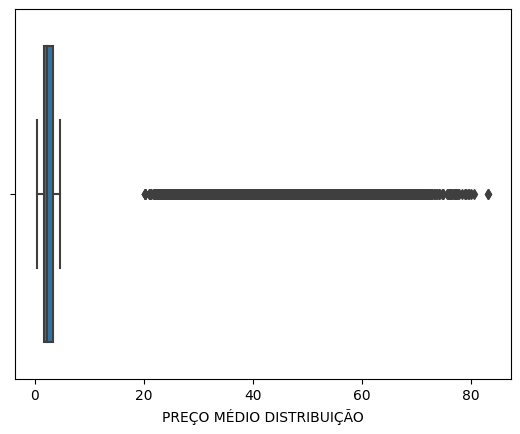

In [19]:
#este gráfico não informa nada, pois estamos misturando regiões, tipos de produtos e estados diferentes.
sns.boxplot(x=df['PREÇO MÉDIO DISTRIBUIÇÃO'], orient='v')

<AxesSubplot: xlabel='PREÇO MÉDIO DISTRIBUIÇÃO', ylabel='ESTADO'>

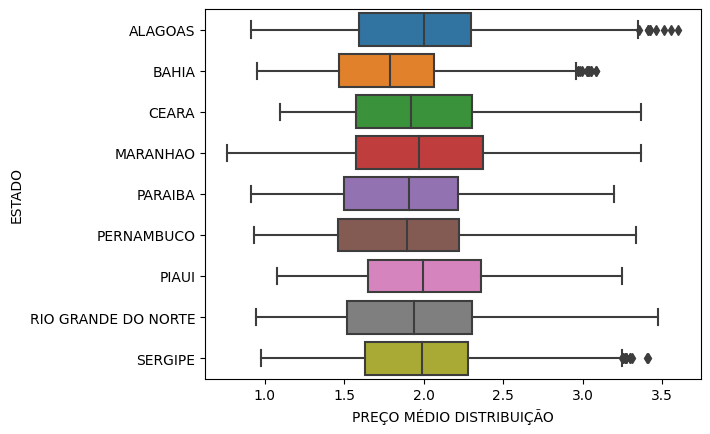

In [32]:
df_etanol_nordeste = df.loc[(df['REGIÃO'] == 'NORDESTE') & (df['PRODUTO'] == 'ETANOL HIDRATADO')] 

sns.boxplot(x=df_etanol_nordeste['PREÇO MÉDIO DISTRIBUIÇÃO'], y=df_etanol_nordeste['ESTADO'])

In [31]:
df_etanol_nordeste.loc[df_etanol_nordeste['PREÇO MÉDIO DISTRIBUIÇÃO'] >= 3.5]

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,...,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
105625,105625,2019-05-05,2019-05-11,NORDESTE,ALAGOAS,ETANOL HIDRATADO,52,R$/l,3.847,0.186,...,4.299,0.246,0.048,3.601,0.252,2.9688,3.8654,0.07,5,2019
105775,105775,2019-05-12,2019-05-18,NORDESTE,ALAGOAS,ETANOL HIDRATADO,52,R$/l,3.707,0.206,...,4.299,0.15,0.056,3.557,0.251,2.9688,3.8654,0.071,5,2019
105925,105925,2019-05-19,2019-05-25,NORDESTE,ALAGOAS,ETANOL HIDRATADO,56,R$/l,3.728,0.246,...,4.599,0.218,0.066,3.510,0.159,3.051,3.728,0.045,5,2019


In [33]:
df_grouped = df.groupby(['REGIÃO', 'PRODUTO']).agg(
    preco_medio = ('PREÇO MÉDIO DISTRIBUIÇÃO', np.mean)
)
df_grouped

preco_medio
REGIÃO       PRODUTO                      
CENTRO OESTE ETANOL HIDRATADO     1.800927
             GASOLINA COMUM       2.664395
             GLP                 38.032365
             GNV                  1.388876
             ÓLEO DIESEL          2.211993
             ÓLEO DIESEL S10      2.919026
NORDESTE     ETANOL HIDRATADO     2.020260
             GASOLINA COMUM       2.601550
             GLP                 32.019454
             GNV                  1.364711
             ÓLEO DIESEL          2.112969
             ÓLEO DIESEL S10      2.715936
NORTE        ETANOL HIDRATADO     2.149589
             GASOLINA COMUM       2.695151
             GLP                 38.404935
             GNV                  1.713959
             ÓLEO DIESEL          2.247253
             ÓLEO DIESEL S10      2.899079
SUDESTE      ETANOL HIDRATADO     1.862771
             GASOLINA COMUM       2.638708
             GLP                 31.128941
             GNV                  1.242011
             ÓLEO DIESEL          2.077769
             ÓLEO DIESEL S10      2.693909
SUL          ETANOL HIDRATADO     1.951408
             GASOLINA COMUM       2.601110
             GLP                 33.005748
             GNV                  1.388729
             ÓLEO DIESEL          2.055550
             ÓLEO DIESEL S10      2.613336

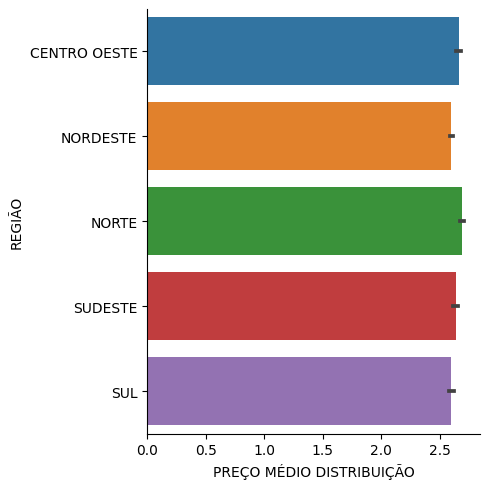

In [42]:
df_gasolina = df.loc[df['PRODUTO'] == 'GASOLINA COMUM']
sns.catplot(
    data=df_gasolina, y="REGIÃO", x="PREÇO MÉDIO DISTRIBUIÇÃO", kind="bar"
)

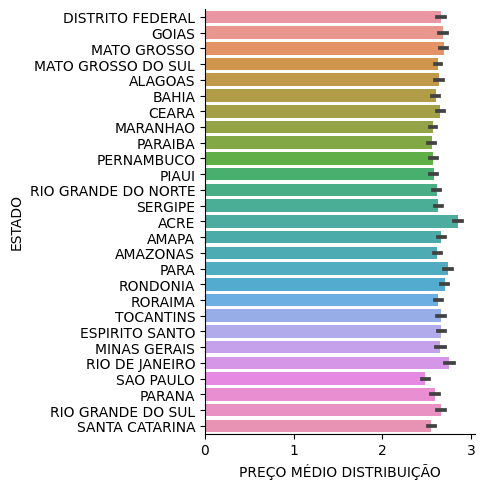

In [55]:
df_gasolina = df.loc[df['PRODUTO'] == 'GASOLINA COMUM']

sns.catplot(
    data=df_gasolina, y="ESTADO", x="PREÇO MÉDIO DISTRIBUIÇÃO", kind="bar")

In [63]:
df_gasolina = df.loc[df['PRODUTO'] == 'GASOLINA COMUM']
df_gasolina_grouped = df_gasolina.groupby('ESTADO').agg(
    preco_medio = ('PREÇO MÉDIO DISTRIBUIÇÃO', np.mean)).reset_index().sort_values(['preco_medio'], ascending=False)

df_gasolina_grouped

,ESTADO,preco_medio
0,ACRE,2.849501
18,RIO DE JANEIRO,2.755518
13,PARA,2.742685
21,RONDONIA,2.700778
10,MATO GROSSO,2.689209
8,GOIAS,2.678747
7,ESPIRITO SANTO,2.665502
2,AMAPA,2.662324
6,DISTRITO FEDERAL,2.659809
26,TOCANTINS,2.659423


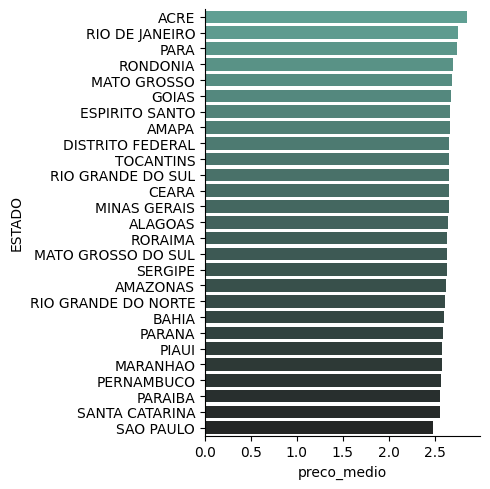

In [67]:
sns.catplot(
    data=df_gasolina_grouped, y='ESTADO', x="preco_medio", kind="bar", palette='dark:#5A9_r')

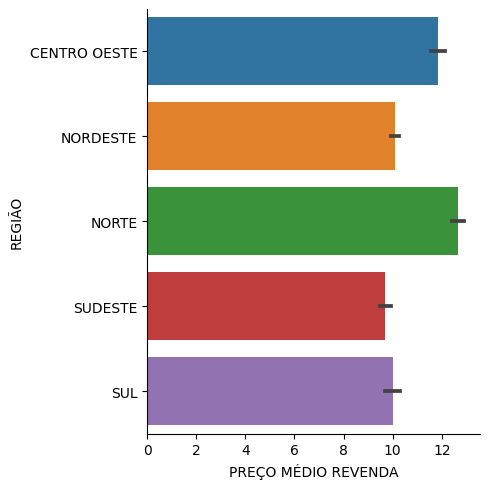

In [70]:
#Não faz sentido olhar os dados de todos os produtos somados...

sns.catplot(data=df, x="PREÇO MÉDIO REVENDA", y="REGIÃO", kind="bar")

<AxesSubplot: xlabel='PREÇO MÉDIO REVENDA', ylabel='PRODUTO'>

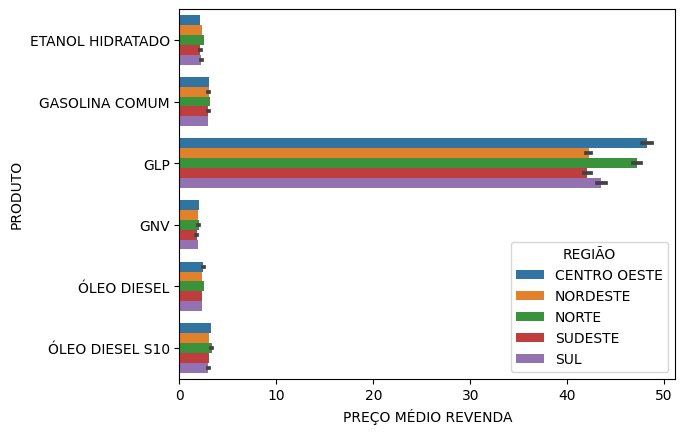

In [71]:
sns.barplot(data=df, x="PREÇO MÉDIO REVENDA", y="PRODUTO", hue="REGIÃO")

In [81]:
df_grouped = df.groupby(['REGIÃO', 'PRODUTO']).agg(
    preco_medio = ('PREÇO MÉDIO DISTRIBUIÇÃO', np.mean)).reset_index().sort_values(['preco_medio'], ascending=False)

df_grouped

,REGIÃO,PRODUTO,preco_medio
14,NORTE,GLP,38.404935
2,CENTRO OESTE,GLP,38.032365
26,SUL,GLP,33.005748
8,NORDESTE,GLP,32.019454
20,SUDESTE,GLP,31.128941
5,CENTRO OESTE,ÓLEO DIESEL S10,2.919026
17,NORTE,ÓLEO DIESEL S10,2.899079
11,NORDESTE,ÓLEO DIESEL S10,2.715936
13,NORTE,GASOLINA COMUM,2.695151
23,SUDESTE,ÓLEO DIESEL S10,2.693909


<AxesSubplot: xlabel='preco_medio', ylabel='PRODUTO'>

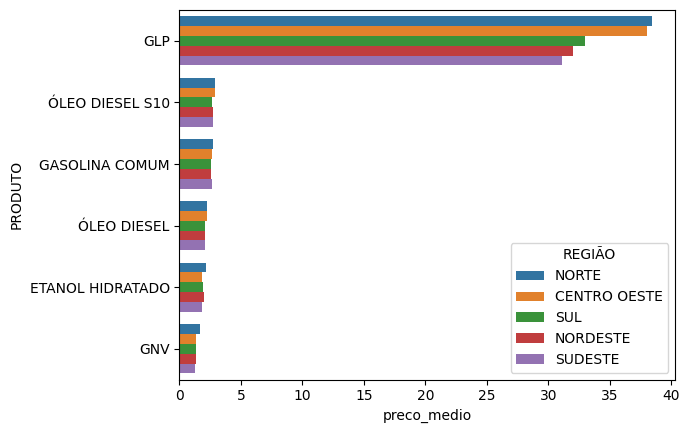

In [78]:
sns.barplot(data=df_grouped, x="preco_medio", y="PRODUTO", hue="REGIÃO")

In [86]:
df_grouped_estado = df.groupby(['REGIÃO', 'ESTADO', 'PRODUTO']).agg(
    preco_medio = ('PREÇO MÉDIO DISTRIBUIÇÃO', np.mean)).reset_index().sort_values(['preco_medio'], ascending=False)

df_grouped_estado

,REGIÃO,ESTADO,PRODUTO,preco_medio
14,CENTRO OESTE,MATO GROSSO,GLP,43.711881
80,NORTE,ACRE,GLP,42.840656
110,NORTE,RORAIMA,GLP,42.255959
115,NORTE,TOCANTINS,GLP,38.833520
104,NORTE,RONDONIA,GLP,38.492032
...,...,...,...,...
134,SUDESTE,RIO DE JANEIRO,GNV,1.224968
146,SUL,PARANA,GNV,1.221403
122,SUDESTE,ESPIRITO SANTO,GNV,1.171215
81,NORTE,ACRE,GNV,NaN


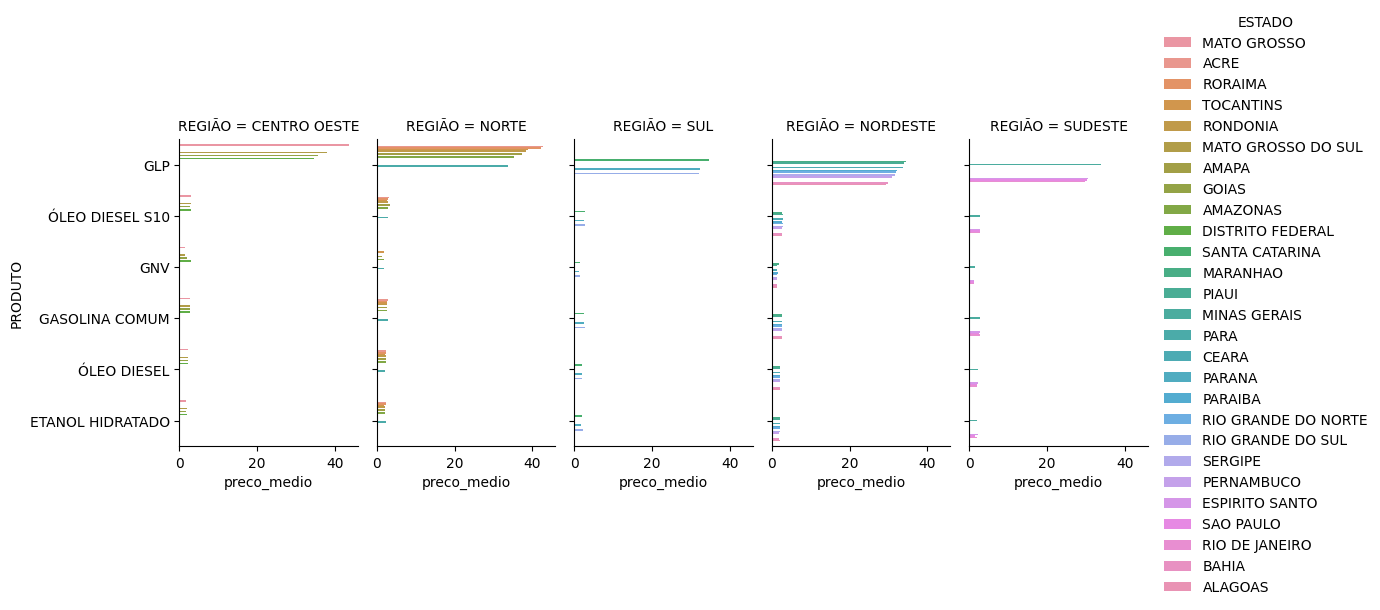

In [91]:
sns.catplot(
    data=df_grouped_estado, x="preco_medio", y="PRODUTO", col="REGIÃO", hue='ESTADO',
    kind="bar", height=4, aspect=.6,
)

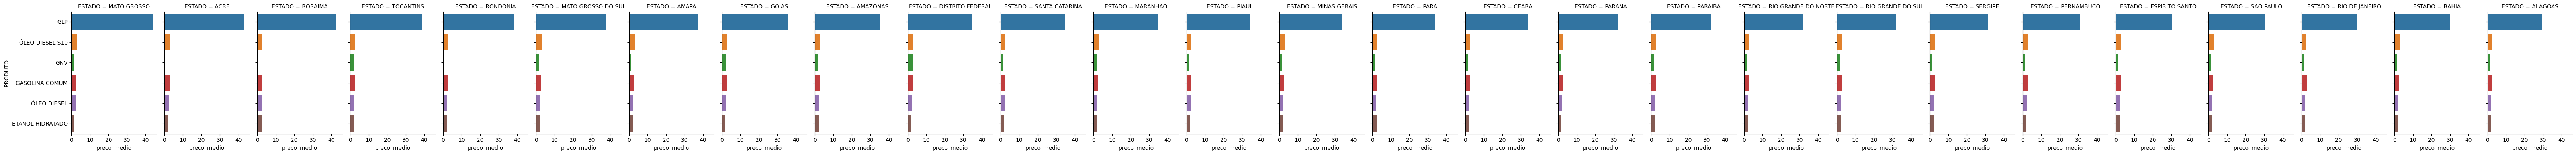

In [89]:
sns.catplot(
    data=df_grouped_estado, x="preco_medio", y="PRODUTO", col="ESTADO",
    kind="bar", height=4, aspect=.6,
)

<AxesSubplot: xlabel='preco_medio', ylabel='ESTADO'>

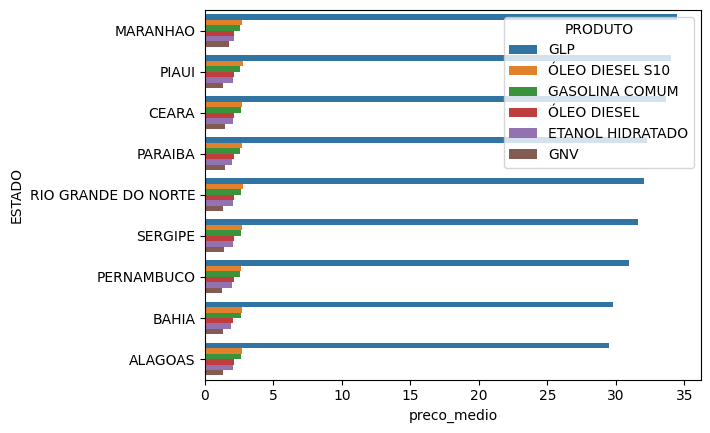

In [95]:
df_nordeste = df.loc[df['REGIÃO'] == 'NORDESTE']
df_nordeste = df_nordeste.groupby(['ESTADO', 'PRODUTO']).agg(
    preco_medio = ('PREÇO MÉDIO DISTRIBUIÇÃO', np.mean)).reset_index().sort_values(['preco_medio'], ascending=False)

sns.barplot(data=df_nordeste, x="preco_medio", y="ESTADO", hue="PRODUTO")

<AxesSubplot: xlabel='preco_medio', ylabel='PRODUTO'>

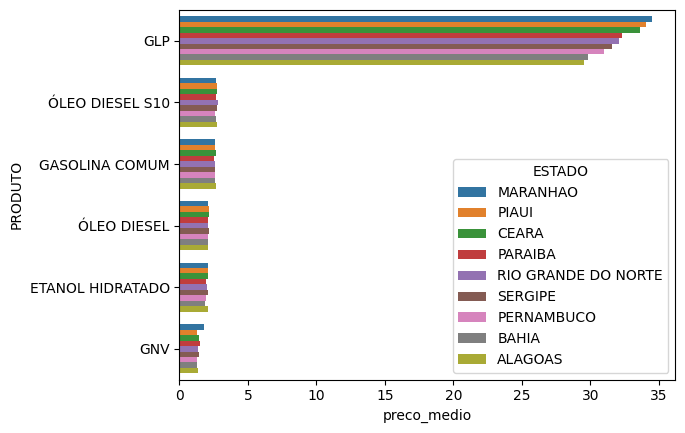

In [96]:
sns.barplot(data=df_nordeste, x="preco_medio", y="PRODUTO", hue="ESTADO")